In [1]:
#!pip install eurostat
import eurostat
import pandas as pd

# Load Eurostat datasets 
# For "demo_r_d2jan" dataset: demography
#demo_data = eurostat.get_data_df('demo_r_d2jan')

# For "tour_ce_omn12" dataset: Local information about tourism
tourism_data = eurostat.get_data_df('tour_ce_omn12')




In [2]:

print("Missing values in tour_ce_omn12:")
print(tourism_data.isnull().sum())  # Count of missing values per column


Missing values in tour_ce_omn12:
freq                   0
indic_to               0
c_resid                0
month                  0
unit                   0
geo\TIME_PERIOD        0
2018                  21
2019                  21
2020                  15
2021                  21
2022                   9
2023                   9
2024               34650
dtype: int64


In [3]:
tourism_data

,freq,indic_to,c_resid,month,unit,geo\TIME_PERIOD,2018,2019,2020,2021,2022,2023,2024
0,A,LSTY,DOM,M01,NR,AT,23783.0,27923.0,34156.0,17680.0,42738.0,47964.0,53079.0
1,A,LSTY,DOM,M01,NR,AT1,8096.0,9799.0,11922.0,11908.0,15822.0,17954.0,20805.0
2,A,LSTY,DOM,M01,NR,AT11,239.0,374.0,563.0,123.0,433.0,762.0,902.0
3,A,LSTY,DOM,M01,NR,AT12,790.0,1323.0,1524.0,829.0,2096.0,2655.0,2956.0
4,A,LSTY,DOM,M01,NR,AT13,7067.0,8102.0,9835.0,10956.0,13293.0,14537.0,16947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45040,A,STY,TOTAL,TOTAL,NR,SK0,201570.0,282091.0,164077.0,143318.0,260114.0,377298.0,NaN
45041,A,STY,TOTAL,TOTAL,NR,SK01,83713.0,127479.0,44507.0,38707.0,72293.0,123117.0,NaN
45042,A,STY,TOTAL,TOTAL,NR,SK02,16825.0,22662.0,15411.0,16703.0,29347.0,40974.0,NaN
45043,A,STY,TOTAL,TOTAL,NR,SK03,57106.0,68598.0,58203.0,47117.0,87260.0,111667.0,NaN


In [4]:

# Check for duplicates
print("Duplicate rows in tour_ce_omn12 dataset:", tourism_data.duplicated().sum())

print("\nDescriptive statistics for tour_ce_omn12:")
print(tourism_data.describe())




Duplicate rows in tour_ce_omn12 dataset: 0

Descriptive statistics for tour_ce_omn12:
               2018          2019          2020          2021          2022  \
count  4.502400e+04  4.502400e+04  4.503000e+04  4.502400e+04  4.503600e+04   
mean   2.283224e+05  2.652797e+05  1.425886e+05  1.912171e+05  3.109515e+05   
std    3.146349e+06  3.627748e+06  1.955285e+06  2.618264e+06  4.212223e+06   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.856000e+03  4.994750e+03  2.314000e+03  3.139000e+03  6.628000e+03   
50%    1.574100e+04  1.960500e+04  9.851500e+03  1.296600e+04  2.462900e+04   
75%    6.653600e+04  8.078500e+04  4.210250e+04  5.487275e+04  9.805500e+04   
max    4.419147e+08  5.119385e+08  2.716981e+08  3.639177e+08  5.965469e+08   

               2023          2024  
count  4.503600e+04  1.039500e+04  
mean   3.751057e+05  1.428560e+05  
std    5.062492e+06  1.014931e+06  
min    0.000000e+00  2.000000e+00  
25%    8.412000e+03  5

In [5]:
# Check for inconsistent values (e.g., negative bookings )

# Check for negative values in numeric columns (optional depending on data context)

numeric_columns_tourism = tourism_data.select_dtypes(include=['float64', 'int64']).columns
negative_values_tourism = tourism_data[numeric_columns_tourism] < 0
print("\nNegative values found in tour_ce_omn12:")
print(negative_values_tourism.sum())


Negative values found in tour_ce_omn12:
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
dtype: int64


In [6]:
#!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Filter dataset for country-level data (two-letter codes)
country_data = tourism_data[tourism_data['geo\\TIME_PERIOD'].str.len() == 2]

# Check the resulting data to ensure it includes only countries
print(country_data['geo\\TIME_PERIOD'].unique())

# Now you can continue with the heatmap or other analysis on country-level data only


['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR' 'HR'
 'HU' 'IE' 'IS' 'IT' 'LI' 'LT' 'LU' 'LV' 'MT' 'NL' 'NO' 'PL' 'PT' 'RO'
 'SE' 'SI' 'SK']


C:\Users\janhr\AppData\Local\Temp\ipykernel_7128\3554227442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_region['month'] = pd.Categorical(data_region['month'], categories=[f"M{str(i).zfill(2)}" for i in range(1, 13)], ordered=True)


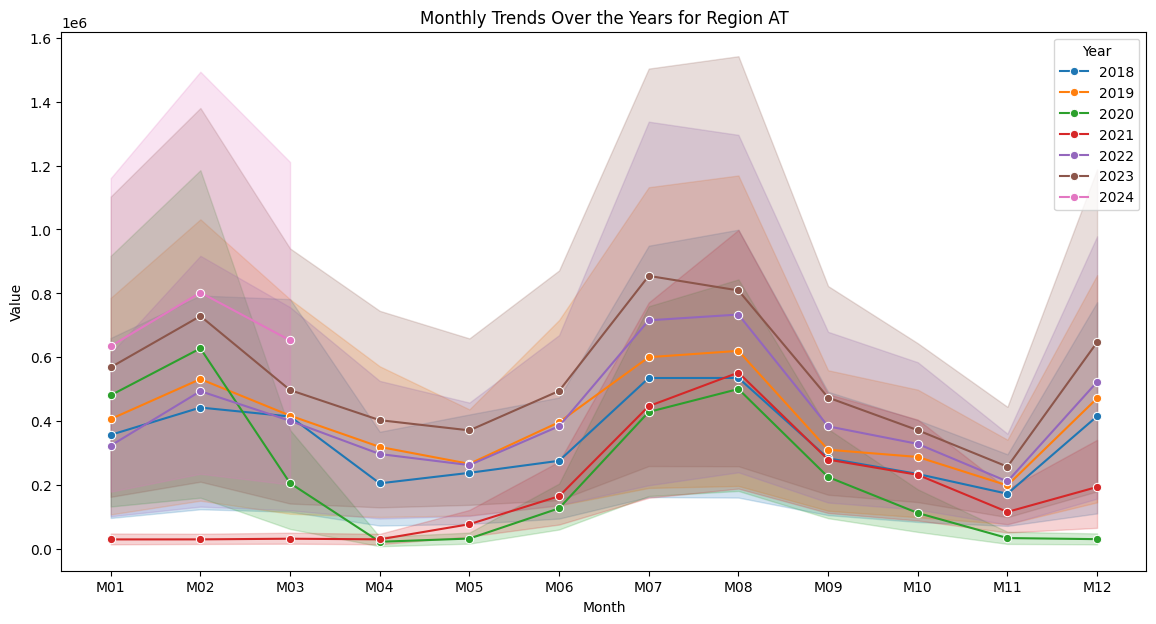

In [22]:
def generate_plot(country_code):
    # Filter data based on the selected country
    data_region = country_data[country_data['geo\\TIME_PERIOD'] == country_code]

    # Ensure the 'month' column is ordered as a categorical type
    data_region['month'] = pd.Categorical(data_region['month'], categories=[f"M{str(i).zfill(2)}" for i in range(1, 13)], ordered=True)

    # Melt the data to long format for Seaborn
    data_long = data_region.melt(id_vars=['month'], value_vars=data_region.columns[6:], var_name='Year', value_name='Value')

    # Create the plot
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='month', y='Value', hue='Year', data=data_long, marker="o")
    plt.title(f"Monthly Trends Over the Years for Region {country_code}")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.legend(title="Year")

unique_countries = tourism_data['geo\\TIME_PERIOD'].unique()
country_code = 'AT' if 'AT' in unique_countries else unique_countries[0]

generate_plot(country_code)

C:\Users\janhr\AppData\Local\Temp\ipykernel_7128\1609384000.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_year = data_year.groupby(['geo\\TIME_PERIOD', 'month']).mean().reset_index()


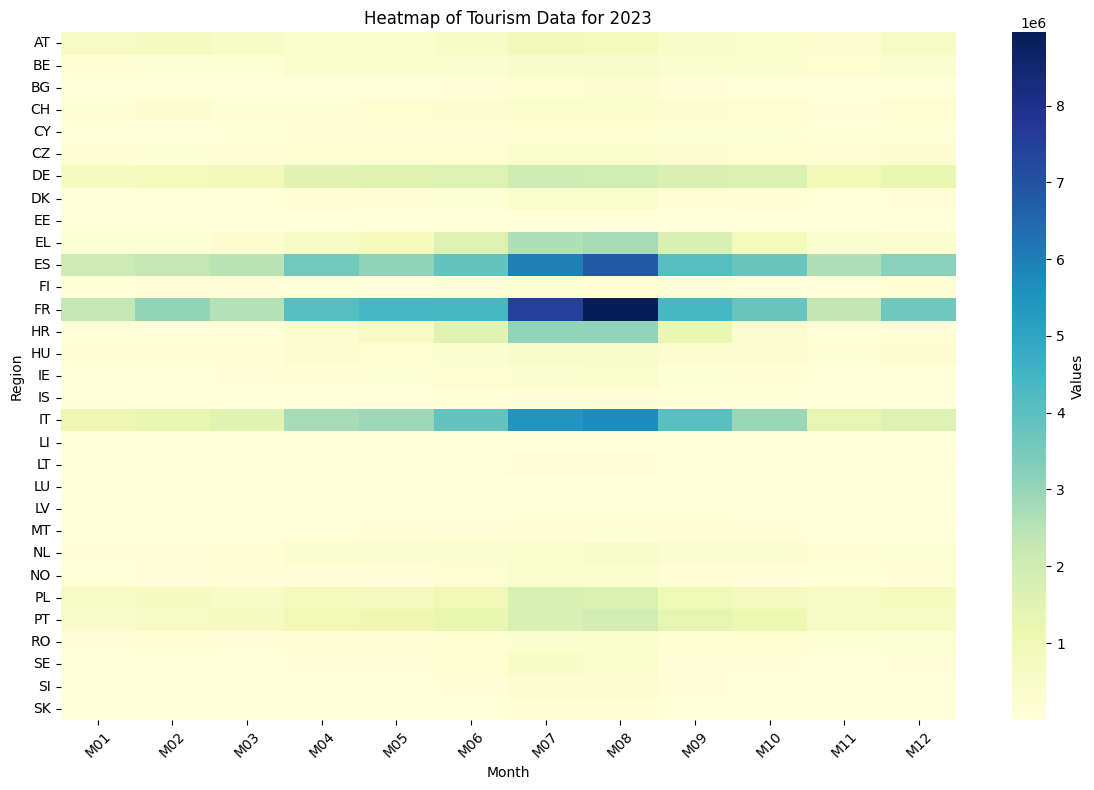

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading (replace with your actual data)
# tourism_data = pd.read_csv("your_data.csv")

# Set the year you want to visualize
year = 2023

# Filter and aggregate data to ensure unique (geo\TIME_PERIOD, month) combinations
data_year = country_data[['geo\\TIME_PERIOD', 'month', str(year)]].dropna()
data_year['month'] = pd.Categorical(data_year['month'], categories=[f"M{str(i).zfill(2)}" for i in range(1, 13)], ordered=True)

# Aggregate duplicates by taking the mean (adjust if needed)
data_year = data_year.groupby(['geo\\TIME_PERIOD', 'month']).mean().reset_index()

# Pivot the data for the heatmap
pivot_df = data_year.pivot(index='geo\\TIME_PERIOD', columns='month', values=str(year))

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=False, fmt=".1f", cbar_kws={'label': 'Values'})
plt.title(f"Heatmap of Tourism Data for {year}")
plt.xlabel("Month")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming tourism_data is your full dataset
# Filter the dataset for regional-level data (codes longer than 2 characters)
region_data = tourism_data[tourism_data['geo\\TIME_PERIOD'].str.len() > 2]

# Melt the data to convert year columns into a single 'year' column
region_data_melted = region_data.melt(
    id_vars=['geo\\TIME_PERIOD', 'month'],
    value_vars=[str(year) for year in range(2018, 2025)],  # Adjust years as needed
    var_name='year',
    value_name='occupancy'
)

# Convert 'year' and 'month' to numeric types
region_data_melted['year'] = pd.to_numeric(region_data_melted['year'])
region_data_melted['month'] = region_data_melted['month'].apply(lambda x: int(x[2:]))  # Convert 'M01' to 1, etc.

# Create a 'date' column for time-series plotting
region_data_melted['date'] = pd.to_datetime(region_data_melted['year'].astype(str) + '-' + region_data_melted['month'].astype(str))

# Plotting small multiples using seaborn's FacetGrid
g = sns.FacetGrid(region_data_melted, col="geo\\TIME_PERIOD", col_wrap=4, height=3, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'date', 'occupancy')

# Customize the plot
g.set_titles("{col_name}")  # Show region code as title for each subplot
g.set_axis_labels("Date", "Occupancy / Guest Count")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Monthly Occupancy/Guest Count Trends by Region (Small Multiples)")
plt.show()


ValueError: invalid literal for int() with base 10: 'TAL'